### Ejercicio regresión polinomial

#### Utilizando los modelos de regresión vistos hasta ahora, genera el modelo que mejor se adapte a los datos adjuntos. La pregunta objetivo es: ¿Cuál es la longitud del pez bluegill en función de su edad?


#### En 1981, 78 diferentes peces bluegills fueron aleatoriamente caracterizados según su longitud y edad de un lago de Minnesota. Los investigadores midieron y grabaron los datos que se adjuntan. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures


Abrimos el archivo de datos

In [2]:
datos = pd.read_csv("Datos mojarra americana.csv")

In [3]:
datos.head()

,age,length
0,1,67
1,1,62
2,2,109
3,2,83
4,2,91


In [4]:
datos.describe()

,age,length
count,78.000000,78.000000
mean,3.628205,143.602564
std,0.927347,24.136699
min,1.000000,62.000000
25%,3.000000,137.250000
50%,4.000000,150.000000
75%,4.000000,160.000000
max,6.000000,188.000000


In [5]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     78 non-null     int64
 1   length  78 non-null     int64
dtypes: int64(2)
memory usage: 1.3 KB


Graficamos los datos

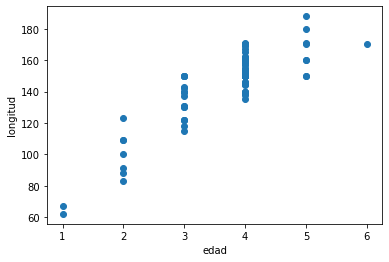

In [6]:
x = datos["age"]
y = datos["length"]

plt.scatter(x, y)
plt.xlabel("edad")
plt.ylabel("longitud")
plt.show()

## Creación de los modelos

### Modelo de regresión lineal

Primero dividivos los datos en los set de training y test usando la función test_train_split de s

In [7]:
X = datos["age"].to_numpy().reshape(-1,1)
y = datos["length"].to_numpy()
X

array([[1],
       [1],
       [2],
       [2],
       [2],
       [2],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [3],
       [2],
       [3],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [4],
       [5],
       [4],
       [4],
       [4],
       [5],
       [2],
       [2],
       [4],
       [3],
       [4],
       [3],
       [4],
       [4],
       [4],
       [4],
       [3],
       [3],
       [3],
       [4],
       [4],
       [3],
       [4],
       [5],
       [4],
       [5],
       [4],
       [4],
       [3],
       [5],
       [5],
       [4],
       [5],
       [3],
       [4],
       [3],
       [4],
       [6],
       [4],
       [5],
       [4],
       [4]], dtype=int64)

In [8]:
#Un 80% de los datos es de entrenamiento y el 20% restante de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [9]:
y_train

array([165, 140, 140, 150, 150, 150, 118, 150, 171, 135, 162, 153, 115,
        67, 160, 154, 170, 122, 160, 138, 160, 140, 122, 160, 152, 150,
       131, 122, 109, 130, 146, 140, 137, 170, 150, 140,  88, 160, 161,
       150, 150, 150, 150, 170, 100,  91, 162,  83, 169, 171, 146, 158,
       150, 150, 140, 162, 131, 109, 145, 170, 123, 167], dtype=int64)

Creamos el modelo

In [10]:
lr = LinearRegression() # Creamos el objeto de Regresión Linear

In [11]:
model = lr.fit(x_train, y_train) # Entrenamos nuestro modelo
model.coef_, model.intercept_ # Obtenemos el coeficiente de regresión y el punto de corte con el eje y

(array([22.52808219]), 61.83493150684927)

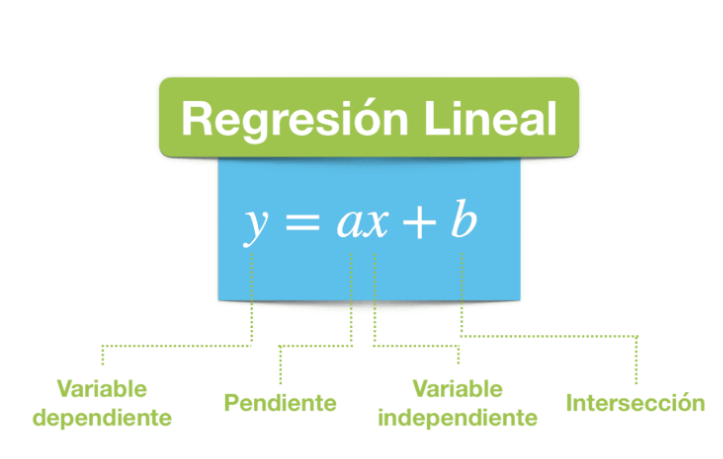

En nuestro caso la ecuación calculada sería:

y = 22.52808219x + 61.83493150684927

In [12]:
y_predicted = lr.predict(x_train) #Usando la ecuación creada calculamos la variable de salida y para los datos de training

Graficamos los valores del set de training y la recta creada a partir de los valores calculados

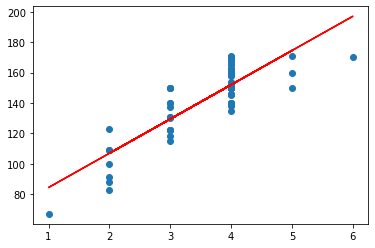

In [13]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_predicted, "r")
plt.show()

In [14]:
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
rmse_train_lr = mean_squared_error(y_train, y_predicted, squared = False) # Calculamos el error entre los valores reales de y y los valores calculados del set de entrenamiento

rmse_train_lr

12.264033958852194

In [16]:
r2_train_lr = r2_score (y_train, y_predicted)
r2_train_lr

0.7193528013085382

La r cuadrado calculada para los datos de training sería lo mismo que calcular el score del modelo con estos datos. La interpretación es que la edad de los peces explica aproximadamente el 72% de la varianza observada en la longitud.

In [17]:
model_score_train_lr = model.score(x_train, y_train)
model_score_train_lr

0.7193528013085382

Usamos ahora los valores de set test

In [18]:
y_test_predicted = lr.predict(x_test)

Graficamos los valores del set de test y la recta creada a partir de los valores calculados

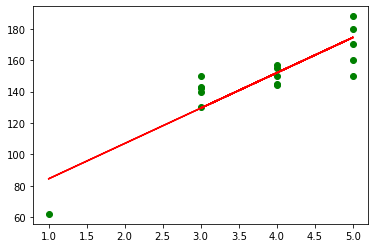

In [19]:
plt.scatter(x_test, y_test, color = "g")
plt.plot(x_test, y_test_predicted, "r")
plt.show()

In [20]:
rmse_test_lr = mean_squared_error (y_test, y_test_predicted, squared = False)
rmse_test_lr

12.675742030207651

In [21]:
model_score_test_lr = model.score(x_test, y_test)
model_score_test_lr

0.7717642014194238

In [22]:
r2_test_lr = r2_score (y_test, y_test_predicted)
r2_test_lr

0.7717642014194238

## Probamos con un modelo de regresesión polinomial

Primero debemos definir el grado del polinomio, para ello hemos importado de la librería scikit learn las características polinomiales o PolynomialFeatures, y procedemos a definir el grado. Empezamos con una función cuadrática.

In [23]:
poly_2 = PolynomialFeatures (2)

Definido el grado se procede a transformar las características de existentes, en este caso tanto x_train como x_test en características de mayor grado, para ello utilizamos el polinomio definido anteriormente y lo entrenamos a estos datos

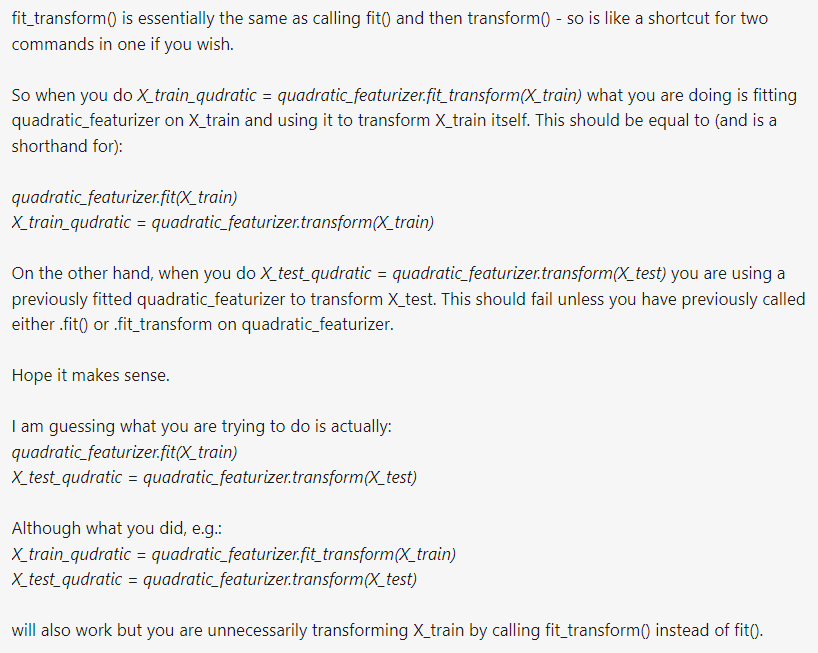

In [24]:
x_train_poly = poly_2.fit_transform(x_train)

x_train_poly

array([[ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  1.,  1.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  3.,  9.],
       [ 1.,  2.,  4.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.,  9.],
       [ 1.,  4., 16.],
       [ 1.,  5., 25.],
       [ 1.,  4., 16.],
       [ 1.,  2.,  4.],
       [ 1.,  5., 25.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  4., 16.],
       [ 1.,  3.

Calculamos los valores de “x” para cada uno de los elementos dentro de la fórmula. En este caso la fórmula es

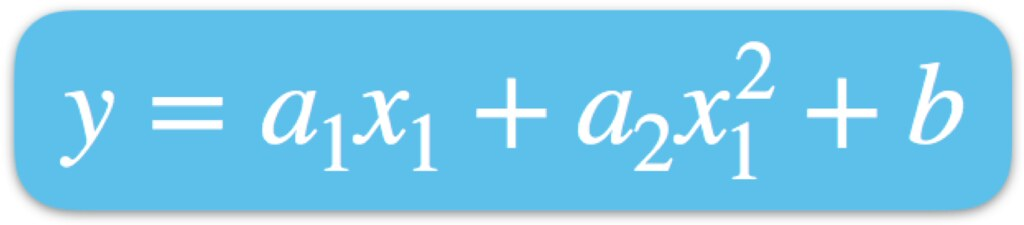

Definimos el algoritmo en nuestro modelo, que en este caso sería LinearRegression, con esta misma instrucción se puede calcular el modelo de Regresión Polinomial.

In [25]:
model2 = lr.fit(x_train_poly, y_train) # Entrenamos nuestro modelo
model2.coef_, model2.intercept_ # Obtenemoslos coeficientes y el punto de corte con el eje y

(array([ 0.        , 55.00027105, -4.85354174]), 11.4777737621975)

En este caso la ecuación quedaría:
y = 55.00027105 x -4.85354174 x2 - 11.4777737621975

In [26]:
y_train_poly_predicted = model2.predict (x_train_poly)

Graficamos los valores del set de training frente a la curva creada a partir de los valores calculados con la ecuación cuadrática

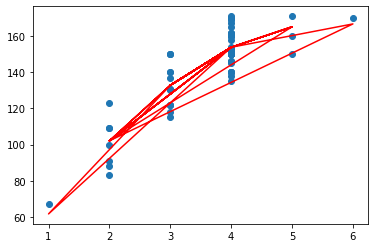

In [27]:
plt.scatter(x_train, y_train)
plt.plot(x_train, y_train_poly_predicted, "r")
plt.show()

Si queremos calcular para estos datos el rmse y el r2

In [28]:
rmse_train_poly2 = mean_squared_error(y_train, y_train_poly_predicted, squared = False)
rmse_train_poly2

10.763018966084823

In [29]:
r2_train_poly2 = r2_score (y_train, y_train_poly_predicted)
r2_train_poly2

0.7838465189861801

Probamos la ecuación con los valores del set test. Primero transformamos los datos de x

In [30]:
x_test_poly = poly_2.fit_transform(x_test)

In [31]:
y_test_poly_predicted = model2.predict(x_test_poly)
y_test_poly_predicted

array([153.8221901 , 165.14058547, 153.8221901 , 132.79671124,
       165.14058547, 132.79671124, 153.8221901 , 132.79671124,
       165.14058547, 153.8221901 , 132.79671124, 165.14058547,
        61.62450307, 165.14058547, 153.8221901 , 132.79671124])

Graficamos los valores del set de test y la linea creada a partir de los valores calculados

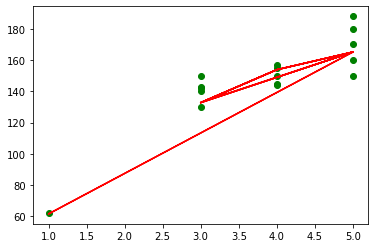

In [32]:
plt.scatter(x_test, y_test, color = "g")
plt.plot(x_test, y_test_poly_predicted, "r")
plt.show()

Calculamos RMSE y r2 para estos datos

In [33]:
rmse_test_poly2 = mean_squared_error(y_test, y_test_poly_predicted, squared = False)
rmse_test_poly2

10.510839421666384

In [34]:
r2_test_poly2 = r2_score (y_test, y_test_poly_predicted)
r2_test_poly2

0.8430679014032718

Usando la ecuación que tenemos (y = 55.00027105 x -4.85354174 x2 - 11.4777737621975) creamos una linea con 100 puntos, que usaremos para superponerla en la gráfica junto con nuestros datos

In [35]:
puntos = np.linspace(1, 6, 100).reshape (-1, 1)
puntos_poly = poly_2.fit_transform (puntos)
y_puntos_poly = model2.predict (puntos_poly)

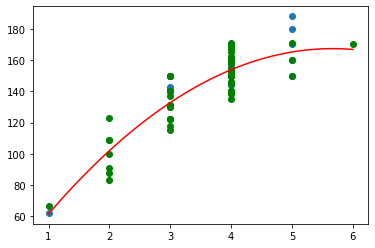

In [36]:
plt.scatter (x_test, y_test)
plt.scatter(x_train, y_train, color = "g")
plt.plot (puntos, y_puntos_poly, "r")
plt.show()

Si queremos comparar las métricas de los dos modelos con los datos de test

Podemos crear un modelo con un polinomio de mayor grada siguiendo los mismos pasos

In [37]:
poly_3 = PolynomialFeatures (3)

In [38]:
x_train_poly3 = poly_3.fit_transform(x_train)

In [39]:
model3 = lr.fit(x_train_poly3, y_train)

In [40]:
x_test_poly3 = poly_3.fit_transform (x_test)

In [41]:
y_test_poly3 = model3.predict(x_test_poly3)

In [42]:
rmse_test_poly3 = mean_squared_error (y_test, y_test_poly3, squared = False)
rmse_test_poly3

10.594325981745554

In [43]:
r2_test_poly3 = r2_score (y_test, y_test_poly3)

In [44]:
resultados = pd.DataFrame( {"Test_RSME": [rmse_test_lr, rmse_test_poly2, rmse_test_poly3], 
                            "Test_r2": [r2_test_lr, r2_test_poly2, r2_test_poly3]}, 
                          index = ["Regresión lineal", "Regresión polinómica grado 2", "Regresión polinómica grado 3"])
resultados

,Test_RSME,Test_r2
Regresión lineal,12.675742,0.771764
Regresión polinómica grado 2,10.510839,0.843068
Regresión polinómica grado 3,10.594326,0.840565


## Resultado

Si prestamos atención a los parámetros RSME y R2 para los tres modelos vemos que la RMSE más baja y la R2 más alta son para el modelo de regresión polinómica de grado 2. Por lo que si queremos estimar la longitud de un pez atendiendo a su edad aplicaríamos la fórmula:

y = 55.00027105 x -4.85354174 x2 - 11.4777737621975

longitud = 55.00027105 edad -4.85354174 edad2 - 11.4777737621975


## Nota

Hay que tener en cuenta que si cambiamos los datos de training y test este resultado puede verse afectado, ya que el dataset es muy pequeño